In [1]:
import pandas as pd

In [23]:
dfc = pd.read_csv("coverage.csv").drop(columns = ["Unnamed: 0"])

In [24]:
dfc

,Date,Series,Value,Candidate
0,2009-05-31,BLOOMBERG,0.0000,Bennet
1,2009-06-07,BLOOMBERG,0.0000,Bennet
2,2009-06-14,BLOOMBERG,0.0000,Bennet
3,2009-06-21,BLOOMBERG,0.0000,Bennet
4,2009-06-28,BLOOMBERG,0.0000,Bennet
...,...,...,...,...
95926,2020-01-26,MSNBC,0.0601,Yang
95927,2020-02-02,MSNBC,0.3934,Yang
95928,2020-02-09,MSNBC,0.3272,Yang
95929,2020-02-16,MSNBC,0.0350,Yang


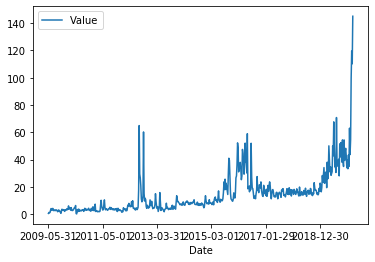

In [25]:
dfc.groupby(by = ["Date"]).sum().plot()

In [6]:
dfc

,Unnamed: 0,Date,Series,Value,Candidate
0,0,2009-05-31,BLOOMBERG,0.0000,Bennet
1,1,2009-06-07,BLOOMBERG,0.0000,Bennet
2,2,2009-06-14,BLOOMBERG,0.0000,Bennet
3,3,2009-06-21,BLOOMBERG,0.0000,Bennet
4,4,2009-06-28,BLOOMBERG,0.0000,Bennet
...,...,...,...,...,...
95926,5044,2020-01-26,MSNBC,0.0601,Yang
95927,5045,2020-02-02,MSNBC,0.3934,Yang
95928,5046,2020-02-09,MSNBC,0.3272,Yang
95929,5047,2020-02-16,MSNBC,0.0350,Yang
